In [1]:
import numpy as np  
import pandas as pd  

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import io

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score

%matplotlib inline


In [2]:
df = pd.read_csv('C:/Users/bagka/Data mining Project/googleplaystore gm.csv')


columns =['app','category','rating','reviews','size','installs','type','price','content','rating','genres','last','updated','current_ver','android_ver','label']

df[:5]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Label
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,1


In [188]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [189]:
# preprocessing of data

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

df['Rating'].dropna()
df = df[df['Rating'] != np.nan]
df['Installs'].dropna()

GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

price = df['Price']

df[df['Price'] > 10]


,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Label,Genres_c
2168,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25M,100000,24.99,Everyone,Medical,25-May-18,2018.5.47,5.0 and up,1,84
2169,Essential Anatomy 3,MEDICAL,4.1,1533,42M,50000,11.99,Mature 17+,Medical,7-Aug-14,1.1.3,4.0.3 and up,1,84
2170,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,79.99,Everyone,Medical,18-Jun-18,19,4.0.3 and up,1,84
2171,EMT Review Plus,MEDICAL,4.5,199,1.8M,10000,11.99,Everyone,Medical,27-Jun-18,3.0.5,4.4W and up,1,84
2173,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,1,84
2178,Block Buddy,MEDICAL,4.0,15,5.0M,1000,14.99,Everyone,Medical,1-Aug-18,7.6.14,4.0 and up,1,84
2182,EMT PASS,MEDICAL,3.4,51,2.4M,1000,29.99,Everyone,Medical,22-Oct-14,2.0.2,4.0 and up,0,84
2185,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5M,100,12.99,Everyone,Medical,25-Jul-18,7,3.0 and up,1,84
2188,AnatomyMapp,MEDICAL,4.1,80,48M,5000,14.99,Everyone,Medical,5-Nov-13,1,3.0 and up,1,84
2193,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.2,168,25M,10000,24.99,Everyone,Medical,11-Aug-17,7.1.17,4.4 and up,1,84


C:\Users\bagka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\bagka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\bagka\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\bagka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


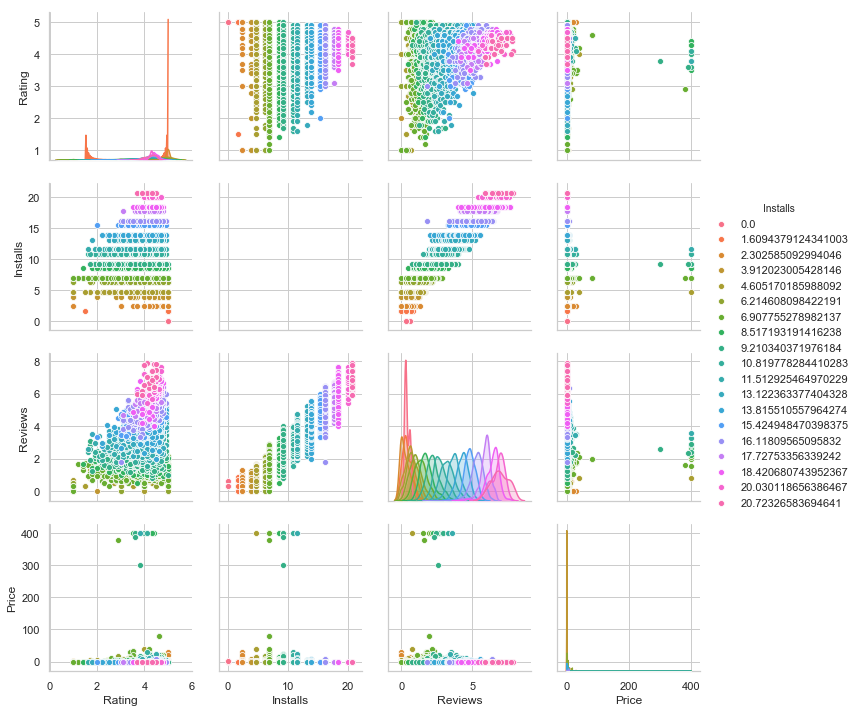

In [190]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna().astype(int)

p = df['Reviews'][df.Reviews!=0].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), price)), 
                              columns=['Rating','Size', 'Installs', 'Reviews', 'Price']), hue='Installs', palette="husl") 


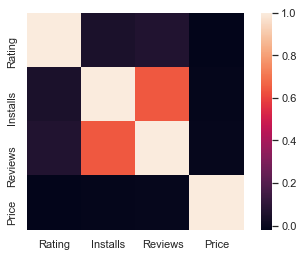

In [191]:
wh1 = df[['Rating','Size', 'Installs', 'Reviews', 'Price']] #Subsetting the data
cor = wh1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

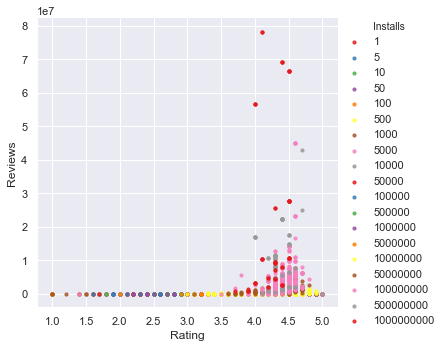

In [192]:
sns.set(color_codes=True)
p = sns.lmplot('Rating', 'Reviews', data= df, hue ='Installs', palette="Set1", fit_reg = False, scatter_kws = {"s": 10})


In [193]:

# feature set creation
feature_cols = ['Rating', 'Installs', 'Genres_c','Price']
X = df[feature_cols] 
y= df.Label

Accuracy of decision tree is : 0.998576512455516


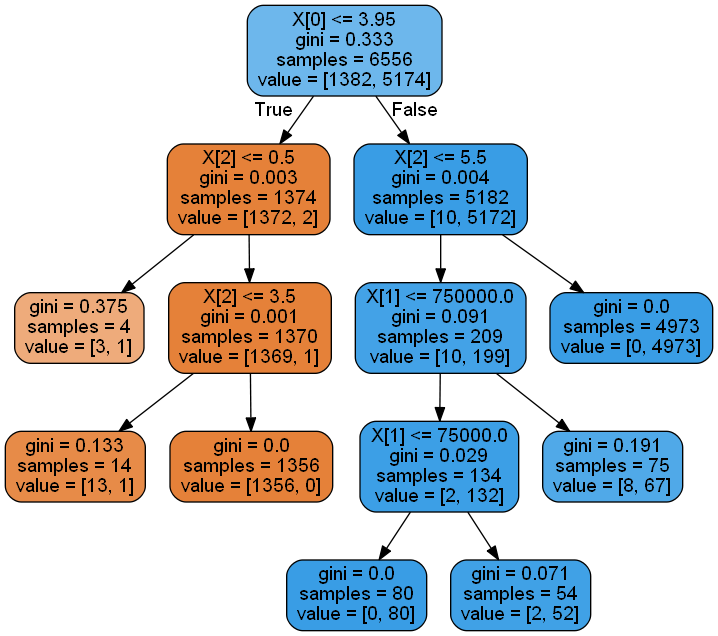

In [194]:
# Create Decision Tree classifer object
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier(min_samples_split = 100)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

acc_train = np.sum(clf.predict(X_train) == y_train )/ float(y_train.size)

acc_test = np.sum(clf.predict(X_test) == y_test )/ float(y_test.size)

acc_decistion = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of decision tree is :", acc_decistion)


# Plot decision tree


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decision_tree.png')
Image(graph.create_png())

Accuracy of KNN : 0.998220640569395
[[ 623    5]
 [   0 2182]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       628
           1       1.00      1.00      1.00      2182

   micro avg       1.00      1.00      1.00      2810
   macro avg       1.00      1.00      1.00      2810
weighted avg       1.00      1.00      1.00      2810



<Figure size 432x288 with 0 Axes>

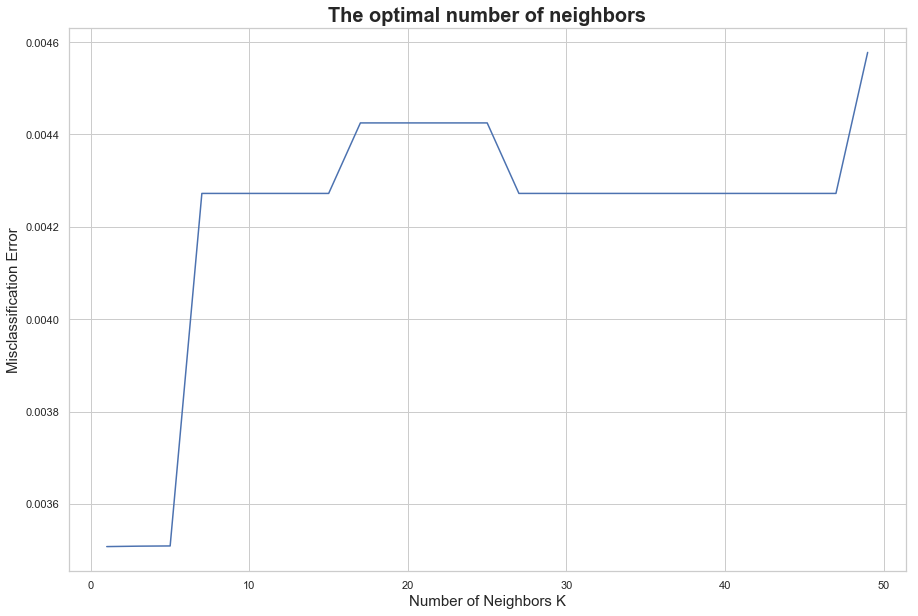

The optimal number of neighbors is 1.


In [203]:
#preprocessing recommandation system
from sklearn import metrics
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

#KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)

#prediction
y_pred = classifier.predict(X_test) 

acc_knn = metrics.accuracy_score(y_test, y_pred)

print("Accuracy of KNN :",acc_knn)
#evaluation of algorithm

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  



k_list = list(range(1,50,2))
cv_scores = []

for k in k_list:  
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()  

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)



The accuracy of the svm classifier on training data is 1.00 out of 1
The accuracy of the svm classifier on test data is 1.00 out of 1


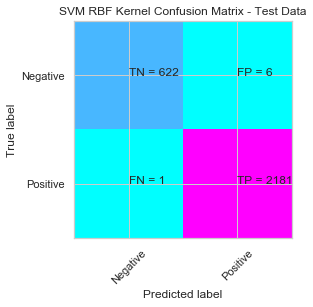

In [196]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train,y_train)
   
x_svm = X_test   
y_svm = y_test
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_svm, y_svm)))    
predicted = svm.predict(X_test)
 
cm = confusion_matrix(y_test, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cool)
classNames = ['Negative','Positive']
plt.title('SVM RBF Kernel Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


Accuracy: 0.9565836298932384


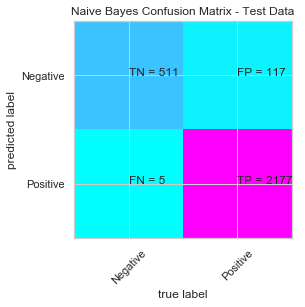

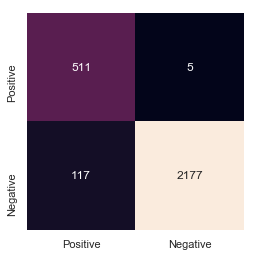

In [197]:



from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



categories = ['Positive','Negative']

cm = confusion_matrix(y_test, y_pred)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.cool)
classNames = ['Negative','Positive']
plt.title('Naive Bayes Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
    
plt.xlabel('true label')
plt.ylabel('predicted label');


for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=categories,
            yticklabels=categories)


[0 0 0 ... 0 0 0]
      Rating  Installs  Genres_c  Price  kmeans
0        4.1     10000         0    0.0       0
1        3.9    500000         1    0.0       0
2        4.7   5000000         0    0.0       0
3        4.5  50000000         0    0.0       0
4        4.3    100000         2    0.0       0
5        4.4     50000         0    0.0       0
6        3.8     50000         0    0.0       0
7        4.1   1000000         0    0.0       0
8        4.4   1000000         0    0.0       0
9        4.7     10000         2    0.0       0
10       4.4   1000000         0    0.0       0
11       4.4   1000000         0    0.0       0
12       4.2  10000000         0    0.0       0
13       4.6    100000         0    0.0       0
14       4.4    100000         0    0.0       0
15       3.2      5000         0    0.0       0
16       4.7    500000         0    0.0       0
17       4.5     10000         0    0.0       0
18       4.3   5000000         0    0.0       0
19       4.6  10000000

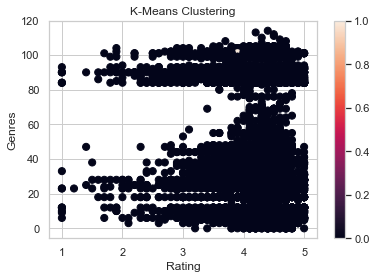

In [198]:
from sklearn.cluster import KMeans
def doKmeans(X, nclust=5):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 2)
print(clust_labels)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

print(X)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Rating'],X['Genres_c'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Rating')
ax.set_ylabel('Genres')
plt.colorbar(scatter)


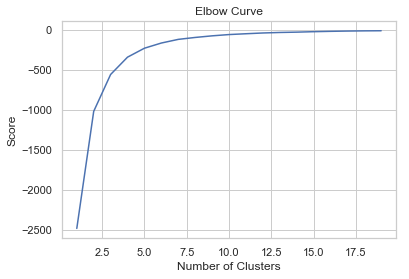

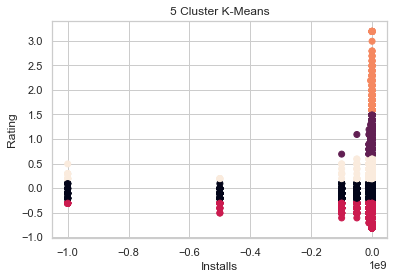

In [199]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

y = X[['Rating']]
x = X[['Installs']]
z = X[['Genres_c']]


Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]

pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')

pl.show()


pca = PCA(n_components=1).fit(y)
pca_d = pca.transform(y)
pca_c = pca.transform(x)

kmeans=KMeans(n_clusters=5)
kmeansoutput=kmeans.fit(y)
kmeansoutput
pl.figure('5 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel('Installs')
pl.ylabel('Rating')
pl.title('5 Cluster K-Means')
pl.show()

No of clusters in DBSCAN :  206
Noise  3659


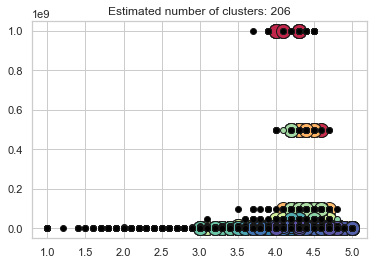

In [200]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('No of clusters in DBSCAN : ',n_clusters_)
print('Noise ',n_noise_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [206]:
print("Accuracy of decision tree is :", acc_decistion)

print("Accuracy of KNN :",acc_knn)

print('Accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(x_svm, y_svm)))

print("Accuracy of naive bayes :",metrics.accuracy_score(y_test, y_pred))

Accuracy of decision tree is : 0.998576512455516
Accuracy of KNN : 0.998220640569395
Accuracy of the svm classifier on test data is 1.00 out of 1
Accuracy of naive bayes : 0.998220640569395


In [202]:
 from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

 clf = AdaBoostClassifier(n_estimators=100)
 scores = cross_val_score(clf, X, Y, cv=5)
 scores.mean()

NameError: name 'Y' is not defined

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it ac# cepts sample weight 
clf.fit(X_train,y_train)